# Matrix Chain Multiplication 시각화

이 노트북은 행렬 체인 곱셈 문제를 동적 프로그래밍으로 해결하고 과정을 시각화합니다.

## 필요한 라이브러리 임포트

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import platform
from IPython.display import clear_output
import time

def set_korean_font():
    """한글 폰트 설정"""
    system = platform.system()
    if system == "Darwin":  # macOS
        plt.rc('font', family='AppleGothic')
    elif system == "Windows":  # Windows
        plt.rc('font', family='Malgun Gothic')
    elif system == "Linux":  # Linux
        plt.rc('font', family='NanumGothic')
    plt.rc('axes', unicode_minus=False)

# 한글 폰트 설정
set_korean_font()

## 시각화 함수 정의

In [11]:
def visualize_dp_tables(m, s, dimensions, current_i=None, current_j=None):
    """DP 테이블 시각화"""
    clear_output(wait=True)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # m 테이블 시각화
    sns.heatmap(m, annot=True, fmt='.0f', cmap='YlOrRd', ax=ax1,
                mask=(m == np.inf))
    ax1.set_title('최소 연산 횟수 테이블 (m)')
    
    # s 테이블 시각화
    sns.heatmap(s, annot=True, fmt='.0f', cmap='YlOrBr', ax=ax2)
    ax2.set_title('최적 분할 지점 테이블 (s)')
    
    # 현재 처리 중인 셀 강조
    if current_i is not None and current_j is not None:
        ax1.add_patch(plt.Rectangle((current_j, current_i), 1, 1, fill=False, 
                                  edgecolor='green', lw=2))
        if current_i < s.shape[0] and current_j < s.shape[1]:
            ax2.add_patch(plt.Rectangle((current_j, current_i), 1, 1, fill=False, 
                                      edgecolor='green', lw=2))
    
    plt.tight_layout()
    plt.show()
    time.sleep(0.5)  # 시각화 지연

def print_optimal_parens(s, i, j, matrix_names=None):
    """최적 괄호 배치 출력"""
    if matrix_names is None:
        matrix_names = [f'A{k}' for k in range(1, j+1)]
    
    if i == j:
        return matrix_names[i-1]
    else:
        k = int(s[i-1][j-1])
        left = print_optimal_parens(s, i, k, matrix_names)
        right = print_optimal_parens(s, k+1, j, matrix_names)
        return f"({left} × {right})"

## Matrix Chain Multiplication 알고리즘 구현

In [12]:
def matrix_chain_order(dimensions):
    """행렬 체인 곱셈 순서 최적화"""
    n = len(dimensions) - 1
    m = np.full((n, n), np.inf)  # 최소 연산 횟수 테이블
    s = np.zeros((n-1, n))       # 최적 분할 지점 테이블
    
    # 대각선 초기화 (길이 1인 체인)
    for i in range(n):
        m[i][i] = 0
    
    print("초기 상태:")
    visualize_dp_tables(m, s, dimensions)
    
    # 길이별로 계산
    for l in range(2, n + 1):
        for i in range(n - l + 1):
            j = i + l - 1
            print(f"\n길이 {l}인 체인 계산 중 ({i+1}, {j+1}):")
            
            for k in range(i, j):
                q = m[i][k] + m[k+1][j] + dimensions[i]*dimensions[k+1]*dimensions[j+1]
                
                if q < m[i][j]:
                    m[i][j] = q
                    if i < n-1:  # s 테이블 범위 체크
                        s[i][j] = k + 1
                    print(f"새로운 최소값 발견: {q} (k={k+1})")
                    visualize_dp_tables(m, s, dimensions, i, j)
    
    return m, s

## 예제 실행

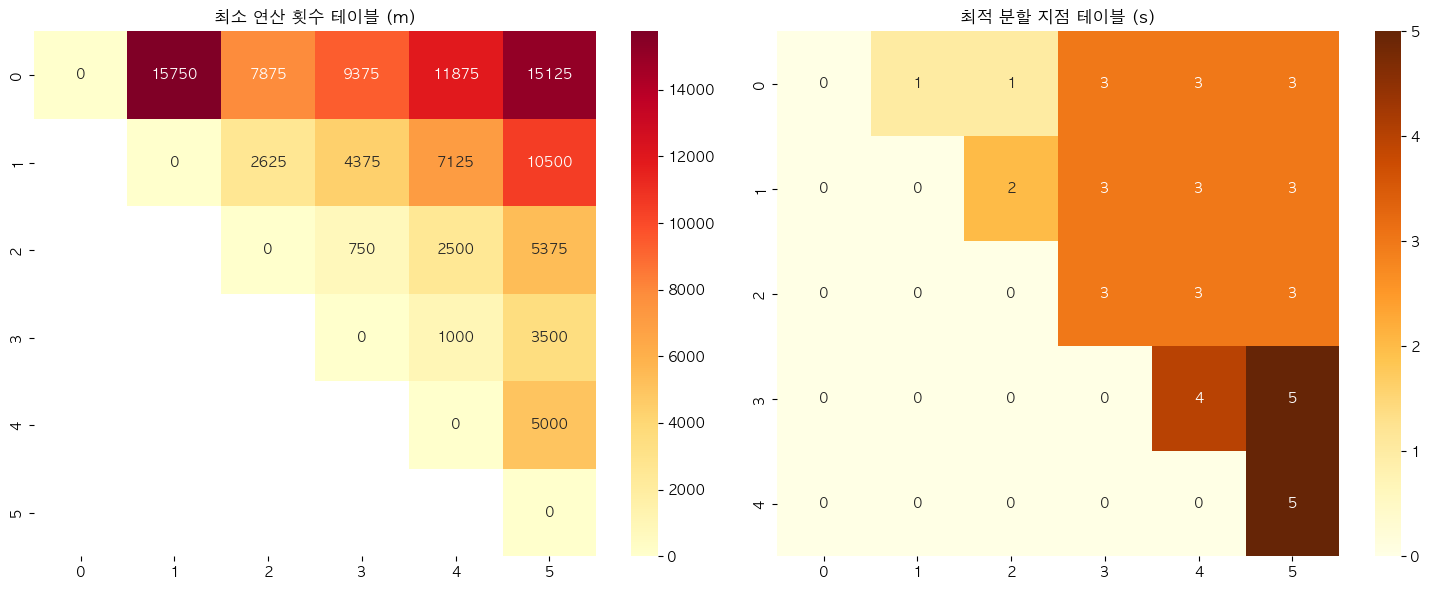


최종 결과:
최소 연산 횟수: 15125.0
최적 괄호 배치: ((A1 × (A2 × A3)) × ((A4 × A5) × A6))


In [13]:
# 예제 행렬 차원
dimensions = [30, 35, 15, 5, 10, 20, 25]

print("행렬 차원:")
for i in range(len(dimensions)-1):
    print(f"A{i+1}: {dimensions[i]}×{dimensions[i+1]}")

m, s = matrix_chain_order(dimensions)

# 최종 테이블 시각화
visualize_dp_tables(m, s, dimensions)

print("\n최종 결과:")
print(f"최소 연산 횟수: {m[0][-1]}")
print("최적 괄호 배치:", print_optimal_parens(s, 1, len(dimensions)-1))